In [ ]:
import torch
from torch import nn


class DeepNetInit(nn.Module):
    def __init__(self, n_layers=5, n_units=64, init_type="xavier"):
        super().__init__()
        layers = []
        for i in range(n_layers):
            in_features = n_units if i > 0 else 10
            out_features = n_units
            linear = nn.Linear(in_features, out_features)

            if init_type == "xavier":
                nn.init.xavier_uniform_(linear.weight)
            elif init_type == "he":
                nn.init.kaiming_uniform_(linear.weight, nonlinearity="relu")
            elif init_type == "lecun":
                nn.init.normal_(linear.weight, mean=0, std=(1.0 / in_features) ** 0.5)

            layers.append(linear)
            layers.append(nn.ReLU())
        layers.append(nn.Linear(n_units, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

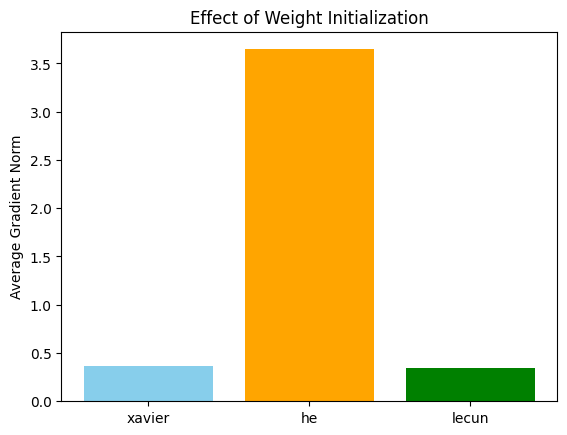

In [ ]:
import matplotlib.pyplot as plt

x = torch.randn(1,10)
y = torch.tensor([[1.0]])

init_types = ["xavier", "he", "lecun"]
grad_norms = []

for init in init_types:
    net = DeepNetInit(n_layers=10, n_units=64, init_type=init)
    criterion = nn.MSELoss()
    
    out = net(x)
    loss = criterion(out, y)
    net.zero_grad()
    loss.backward()
    
    norms = [p.grad.norm().item() for p in net.parameters() if p.grad is not None]
    grad_norms.append(sum(norms)/len(norms))

plt.bar(init_types, grad_norms, color=['skyblue','orange','green'])
plt.ylabel("Average Gradient Norm")
plt.title("Effect of Weight Initialization")
plt.show()